In [4]:
import os
import huggingface_hub
from huggingface_hub import hf_hub_download, HfApi

# Make a bar chart for cnt
import matplotlib.pyplot as plt
import numpy as np

In [231]:
FRAMEWORK_LIST = ["pytorch", "tf", "jax", "onnx", "tflite", "tensorflow", "safetensors", "keras", "coreml", "rust", "mlx", "paddlepaddle", "nemo", "tflite", "numpy"]
# init cnt variables for each framework
cnt_fram = {}
for domain in hf_domains:
    cnt_fram[domain] = {}
    for framework in FRAMEWORK_LIST:
        cnt_fram[domain][framework] = 0
    

In [232]:
api = HfApi()

In [233]:
hf_domains  = {
        'Multimodal': ['feature-extraction', 'text-to-image', 'image-to-text', 'text-to-video', 'visual-question-answering', 'graph-machine-learning'],
        'Computer Vision': ['depth-estimation', 'image-classification', 'object-detection', 'image-segmentation', 'image-to-image', 'unconditional-image-generation', 'video-classification', 'zero-shot-image-classification'],
        'NLP': ['text-classification', 'token-classification', 'table-question-answering', 'question-answering', 'zero-shot-classification', 'translation', 'summarization', 'conversational', 'text-generation', 'text2text-generation', 'fill-mask', 'sentence-similarity', 'table-to-text', 'multiple-choice', 'text-retrieval'],
        'Audio': ['text-to-speech', 'text-to-audio', 'automatic-speech-recognition', 'audio-to-audio', 'audio-classification', 'voice-activity-detection'],
        'Other': ['reinforcement-learning', 'robotics', 'tabular-classification', 'tabular-regression', 'tabular-to-text', 'time-series-forecasting']
    }


FILE_EXTENSIONS = {".onnx", ".pt", ".pkl", ".bin", ".msgpack", ".model", "coreml", ".safetensors", ".h5", ".ot", ".pdparams", ".pb", ".npy", ".npz", ".mlmodel", ".jax", ".pt", ".pth", ".tflite"}

In [234]:
cnt_ext = {}
for domain in hf_domains:
    cnt_ext[domain] = {}
    for ext in FILE_EXTENSIONS:
        cnt_ext[domain][ext] = 0

In [235]:
num_models = {}
for domain in hf_domains:
    num_models[domain] = {}
    for task in hf_domains[domain]:
        num_models[domain][task] = 0
        models = list(api.list_models(filter=task, sort="downloads", direction=-1, limit=50))
        
        num_models[domain][task] += len(models)
        for model in models:
            for framework in FRAMEWORK_LIST:
                if framework in model.tags:
                    cnt_fram[domain][framework] += 1
            # check files
            try:
                files = list(api.list_repo_tree(model.id))
            except:
                continue
            
            for file in files:
                for ext in FILE_EXTENSIONS:
                    if ext in file.path:
                        cnt_ext[domain][ext] += 1
                

In [236]:
num_models

{'Multimodal': {'feature-extraction': 50,
  'text-to-image': 50,
  'image-to-text': 50,
  'text-to-video': 50,
  'visual-question-answering': 50,
  'graph-machine-learning': 2},
 'Computer Vision': {'depth-estimation': 50,
  'image-classification': 50,
  'object-detection': 50,
  'image-segmentation': 50,
  'image-to-image': 50,
  'unconditional-image-generation': 50,
  'video-classification': 50,
  'zero-shot-image-classification': 50},
 'NLP': {'text-classification': 50,
  'token-classification': 50,
  'table-question-answering': 50,
  'question-answering': 50,
  'zero-shot-classification': 50,
  'translation': 50,
  'summarization': 50,
  'conversational': 50,
  'text-generation': 50,
  'text2text-generation': 50,
  'fill-mask': 50,
  'sentence-similarity': 50,
  'table-to-text': 9,
  'multiple-choice': 50,
  'text-retrieval': 0},
 'Audio': {'text-to-speech': 50,
  'text-to-audio': 50,
  'automatic-speech-recognition': 50,
  'audio-to-audio': 50,
  'audio-classification': 50,
  'voi

In [227]:
# sum the cnt for each domain (i.e. keys in num_models)
sum_models = {}
for domain in num_models:
    sum_models[domain] = 0
    for task in num_models[domain]:
        sum_models[domain] += num_models[domain][task]

In [209]:
sum_models

{'Multimodal': 252,
 'Computer Vision': 400,
 'NLP': 659,
 'Audio': 279,
 'Other': 168}

In [238]:
# Example structure of cnt_ext and cnt for each domain
# cnt_ext = {'Multimodal': {'.pt': 10, '.onnx': 5, ...}, 'Computer Vision': {'.pt': 8, ...}, ...}
# cnt = {'Multimodal': {'PyTorch': 15, 'TensorFlow': 7, ...}, 'Computer Vision': {'PyTorch': 12, ...}, ...}

# Calculating percentages
perc_ext = {domain: {ext: (count / sum(cnt_ext[domain].values()) * 100) 
             for ext, count in cnt_ext[domain].items()} 
             for domain in cnt_ext}

perc_frameworks = {domain: {framework: (count / sum(cnt_fram[domain].values()) * 100) 
                  for framework, count in cnt_fram[domain].items()} 
                  for domain in cnt_fram}


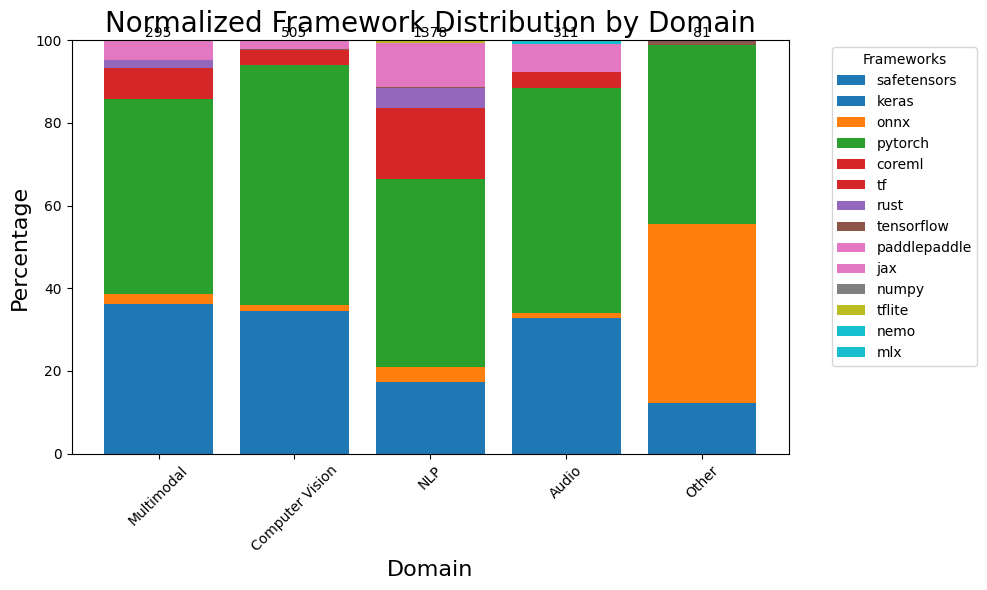

In [259]:
# Example structure of cnt: {'Multimodal': {'PyTorch': 15, 'TensorFlow': 7, ...}, ...}

domains = list(cnt_fram.keys())  # List of domains
frameworks = set(f for domain in cnt_fram for f in cnt_fram[domain])  # Set of all frameworks

# Normalize the counts to percentages
cnt_normalized = {domain: {fw: cnt_fram[domain].get(fw, 0) / sum(cnt_fram[domain].values()) * 100
               for fw in frameworks} for domain in domains}

# Colors for each framework
colors = plt.cm.tab10(np.linspace(0, 1, len(frameworks)))
framework_colors = dict(zip(frameworks, colors))

# Create a stacked bar chart
plt.figure(figsize=(10, 6))
bottoms = np.zeros(len(domains))  # Keeps track of the 'bottom' position for each stack

for framework in frameworks:
    framework_percents = [cnt_normalized[domain].get(framework, 0) for domain in domains]
    plt.bar(domains, framework_percents, bottom=bottoms, label=framework, color=framework_colors[framework])
    bottoms += np.array(framework_percents)

# Add total count above each bar
for i, domain in enumerate(domains):
    total = sum(cnt_fram[domain].values())
    plt.text(i, 100, str(total), ha='center', va='bottom')

plt.xticks(rotation=45)
plt.xlabel("Domain", fontsize=16)
plt.ylabel("Percentage", fontsize=16)
plt.title("Normalized Framework Distribution by Domain", fontsize=20)
plt.legend(title="Frameworks", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

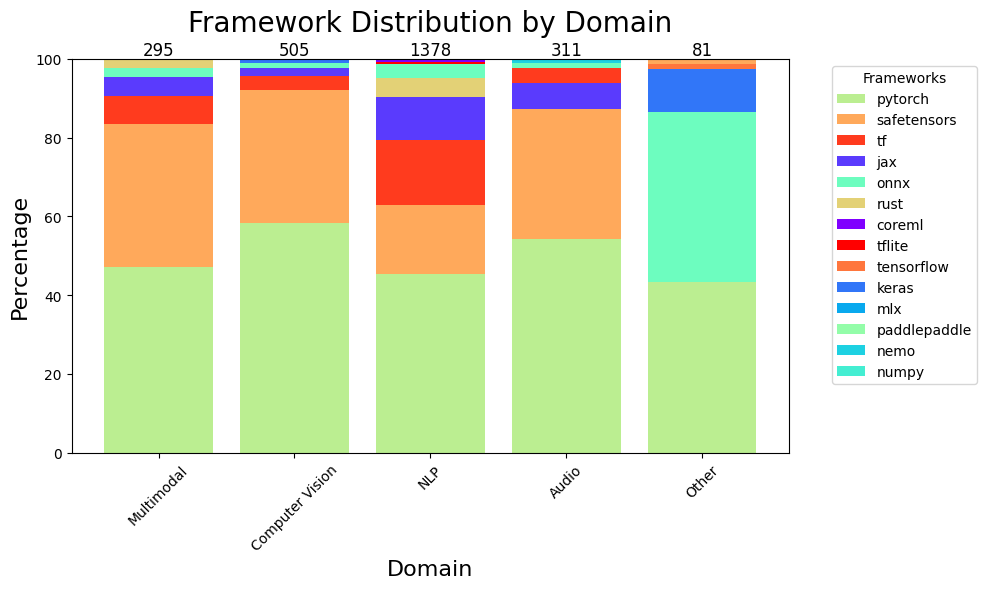

In [286]:

domains = list(cnt_fram.keys())  # List of domains

# Normalize the counts to percentages and sort frameworks in each domain
cnt_normalized_sorted = {}
for domain in domains:
    frameworks_counts = cnt_fram[domain]
    sorted_frameworks = sorted(frameworks_counts, key=frameworks_counts.get, reverse=True)  # Sort frameworks by count
    cnt_normalized_sorted[domain] = {fw: frameworks_counts[fw] / sum(frameworks_counts.values()) * 100 for fw in sorted_frameworks}

# Select a different color set
colors = plt.cm.rainbow(np.linspace(0, 1, len(cnt_fram[domains[0]])))  # Adjust the number of colors based on the number of frameworks
framework_colors = {fw: color for fw, color in zip(sorted(cnt_fram[domains[0]]), colors)}

# Create a stacked bar chart
plt.figure(figsize=(10, 6))
for i, domain in enumerate(domains):
    bottoms = 0  # Reset the 'bottom' for each domain
    for framework in cnt_normalized_sorted[domain]:
        percent = cnt_normalized_sorted[domain][framework]
        plt.bar(domain, percent, bottom=bottoms, label=framework if i == 0 else "", color=framework_colors[framework])
        bottoms += percent

# Add total count above each bar with larger font size
for i, domain in enumerate(domains):
    total = sum(cnt_fram[domain].values())
    plt.text(i, 100, str(total), ha='center', va='bottom', fontsize=12)  # Increase fontsize here

plt.xticks(rotation=45)
plt.xlabel("Domain", fontsize=16)
plt.ylabel("Percentage", fontsize=16)
plt.title("Framework Distribution by Domain", fontsize=20, pad=20)  # Increase pad value to move title higher
plt.legend(title="Frameworks", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

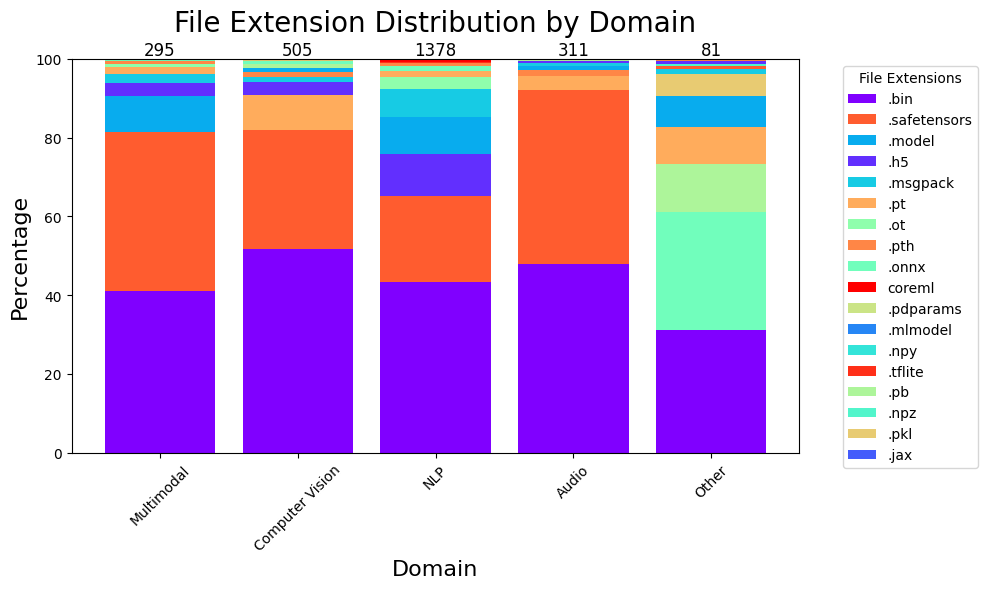

In [302]:
domains = list(cnt_ext.keys())  # List of domains

# Normalize the counts to percentages and sort file extensions in each domain
cnt_normalized_sorted = {}
for domain in domains:
    ext_counts = cnt_ext[domain]
    sorted_exts = sorted(ext_counts, key=ext_counts.get, reverse=True)  # Sort extensions by count
    cnt_normalized_sorted[domain] = {ext: ext_counts[ext] / sum(ext_counts.values()) * 100 for ext in sorted_exts}

# Select a different color set for file extensions
colors = plt.cm.rainbow(np.linspace(0, 1, len(cnt_ext[domains[0]])))  # Adjust the number of colors
ext_colors = {ext: color for ext, color in zip(sorted(cnt_ext[domains[0]]), colors)}

# Create a stacked bar chart for file extensions
plt.figure(figsize=(10, 6))
for i, domain in enumerate(domains):
    bottoms = 0  # Reset the 'bottom' for each domain
    for ext in cnt_normalized_sorted[domain]:
        percent = cnt_normalized_sorted[domain][ext]
        plt.bar(domain, percent, bottom=bottoms, label=ext if i == 0 else "", color=ext_colors[ext])
        bottoms += percent

# Add total count above each bar with larger font size
for i, domain in enumerate(domains):
    total = sum(cnt_fram[domain].values())
    plt.text(i, 100, str(total), ha='center', va='bottom', fontsize=12)  # Increase fontsize here

plt.xticks(rotation=45)
plt.xlabel("Domain", fontsize=16)
plt.ylabel("Percentage", fontsize=16)
plt.title("File Extension Distribution by Domain", fontsize=20, pad=20)
plt.legend(title="File Extensions", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

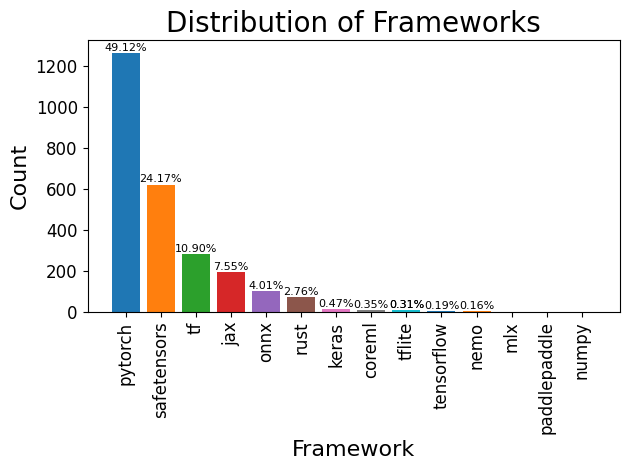

In [210]:

# Assuming cnt is a dictionary like {'framework1': count1, 'framework2': count2, ...}
# Update this dictionary based on your actual count data
cnt = {framework: cnt[framework] for framework in FRAMEWORK_LIST}

# Sort FRAMEWORK_LIST based on counts
sorted_frameworks = sorted(FRAMEWORK_LIST, key=lambda x: cnt[x], reverse=True)

# Calculate the total count for percentage calculation
total_count = sum(cnt.values())

# Make a bar chart
for framework in sorted_frameworks:
    plt.bar(framework, cnt[framework])

plt.xticks(rotation=90)
plt.xlabel("Framework", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.title("Distribution of Frameworks", fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add data label and percentage on top of each bar
for framework in sorted_frameworks:
    count = cnt[framework]
    perc = count / total_count
    if perc == 0:
        continue
    percentage = f"{(perc * 100):.2f}%"
    
    plt.text(framework, count + 10, f"{percentage}", ha="center", fontsize=8)  # Adjust the offset as needed

plt.tight_layout()
plt.show()


['.bin', '.safetensors', '.model', '.h5', '.pt', '.msgpack', '.onnx', '.pth', '.ot', '.pb', '.pkl', 'coreml', '.tflite', '.npz', '.mlmodel', '.npy', '.pdparams', '.jax']


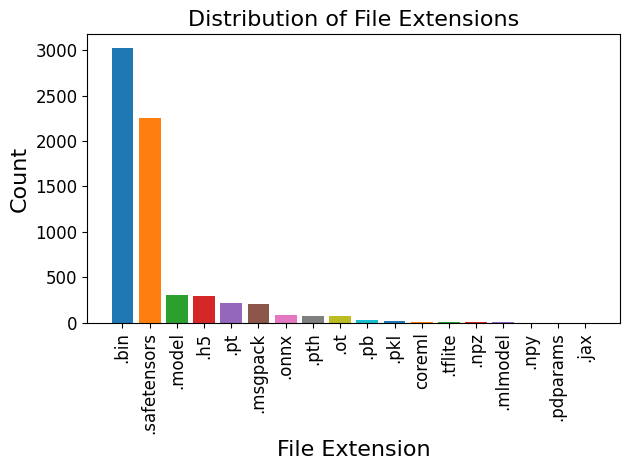

In [212]:
cnt_ext_sorted = sorted(cnt_ext, key=lambda x: cnt_ext[x], reverse=True)
print(cnt_ext_sorted)
total_count = sum(cnt_ext.values())

# Make a bar chart
# plt.figure(figsize=(10, 6))  # Optional: Adjusts the figure size
for extension in cnt_ext_sorted:
    plt.bar(extension, cnt_ext[extension])

plt.xticks(rotation=90)
plt.xlabel("File Extension", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.title("Distribution of File Extensions", fontsize=16)
# increase the font size of the x and y ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# Add data label and percentage on top of each bar
# Add data label and percentage on top of each bar
# for extension in cnt_ext_sorted:
#     count = cnt_ext[extension]
#     percentage = f"{(count / total_count * 100):.2f}%"
    # plt.text(extension, count + 50, f"{percentage}", ha="center", fontsize=10)

plt.tight_layout()
plt.show()

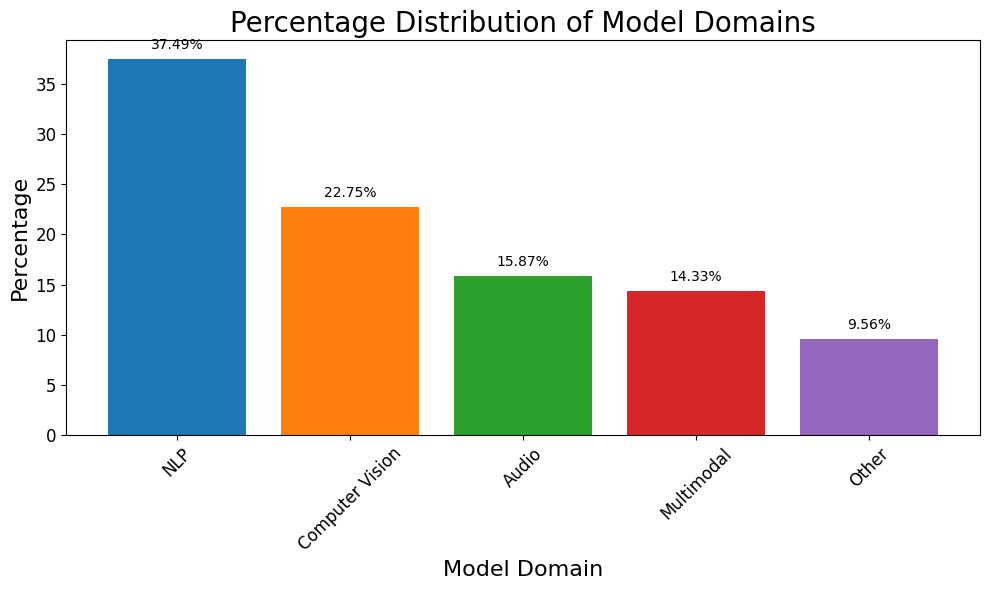

In [213]:
import matplotlib.pyplot as plt

# Calculate the total number of models across all domains
total_models = sum(sum(num_models[domain].values()) for domain in hf_domains)

# Calculate the percentage of models in each domain
domain_percentages = {domain: sum(num_models[domain].values()) / total_models * 100 for domain in hf_domains}

# Sort the domains based on percentages
sorted_domains = sorted(domain_percentages, key=lambda x: domain_percentages[x], reverse=True)

# Make a bar chart for the percentages
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
for domain in sorted_domains:
    plt.bar(domain, domain_percentages[domain])

plt.xticks(rotation=45)
plt.xlabel("Model Domain", fontsize=16)
plt.ylabel("Percentage", fontsize=16)
plt.title("Percentage Distribution of Model Domains", fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add percentage on top of each bar
for domain in sorted_domains:
    percentage = f"{domain_percentages[domain]:.2f}%"
    plt.text(domain, domain_percentages[domain] + 1, percentage, ha="center", fontsize=10)  # Adjust the offset as needed

plt.tight_layout()
plt.show()


In [154]:
models = list(api.list_models(filter="", sort="downloads", direction=-1, limit=5))

In [155]:
models

[]

In [129]:
model[1].tags

TypeError: 'ModelInfo' object is not subscriptable

In [130]:
model = models[1]

.gitattributes
README.md
config.json
model.safetensors
pytorch_model.bin
special_tokens_map.json
tokenizer.json
tokenizer_config.json
vocab.txt


In [109]:
files = api.get_paths_info(model[0].id, paths="./")
files

[]